In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#Read the data
movies = pd.read_csv('/Users/aidakurmangali/Downloads/movies.csv')

In [4]:
#Checking the first rows of the data

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [5]:
#finding missing data
for col in movies.columns:
    missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#remove missing values

movies = movies.dropna()

In [7]:
#data types
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#removing the decimel points

movies['votes'] = movies['votes'].astype('int64')
movies['runtime'] = movies['runtime'].astype('int64')
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

In [10]:
#Since we have two columns with Released date and Year, we need to check if the information is same
movies['released_year'] = movies['released'].str.extract(r'(\d{4})').astype(int)



In [11]:
#Checking if the all columns match
(movies['year'] == movies['released_year']).all()

np.False_

In [12]:
#Finding the rows that did not match
movies[movies['year'] != movies['released_year']]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97,1981
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000,2956630,Renaissance Pictures,85,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,Stan & Ollie,PG,Biography,2018,"January 11, 2019 (United Kingdom)",7.2,34000,Jon S. Baird,Jeff Pope,Steve Coogan,United Kingdom,10000000,24420923,Entertainment One,98,2019
7432,Dragon Ball Super: Broly,PG,Animation,2018,"January 16, 2019 (United States)",7.8,24000,Tatsuya Nagamine,Akira Toriyama,Masako Nozawa,Japan,8500000,115757940,Toei Company,100,2019
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119,2020
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112,2020


In [13]:
movies= movies.sort_values(by=['gross'], inplace=False, ascending=False)

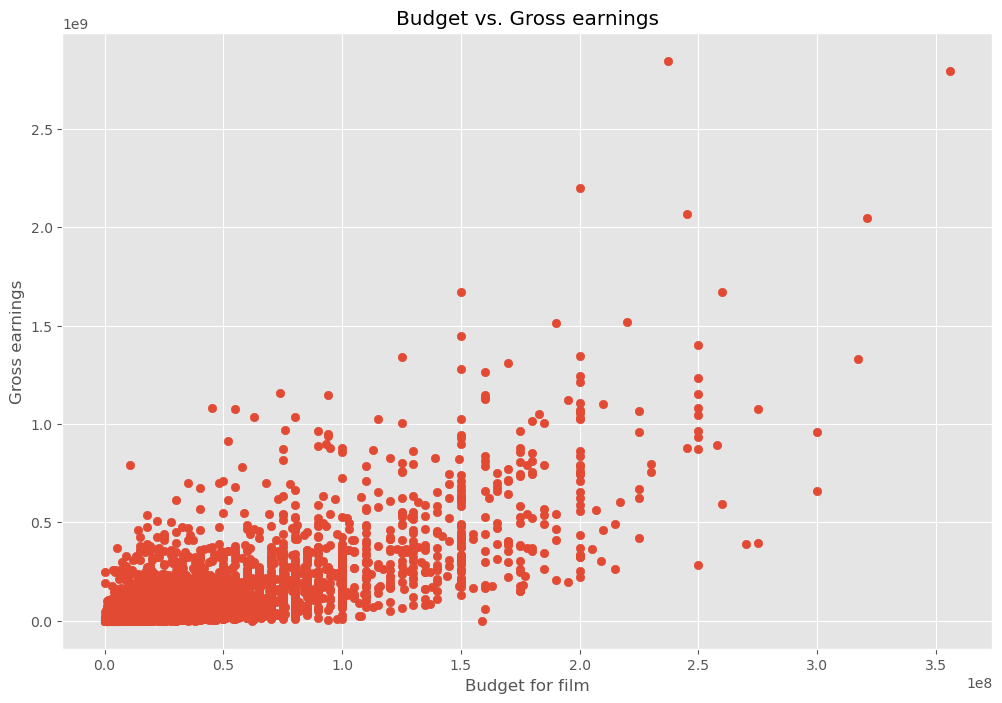

In [14]:
#
plt.scatter(x = movies['budget'], y = movies['gross'])

plt.title('Budget vs. Gross earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross earnings')

plt.show()

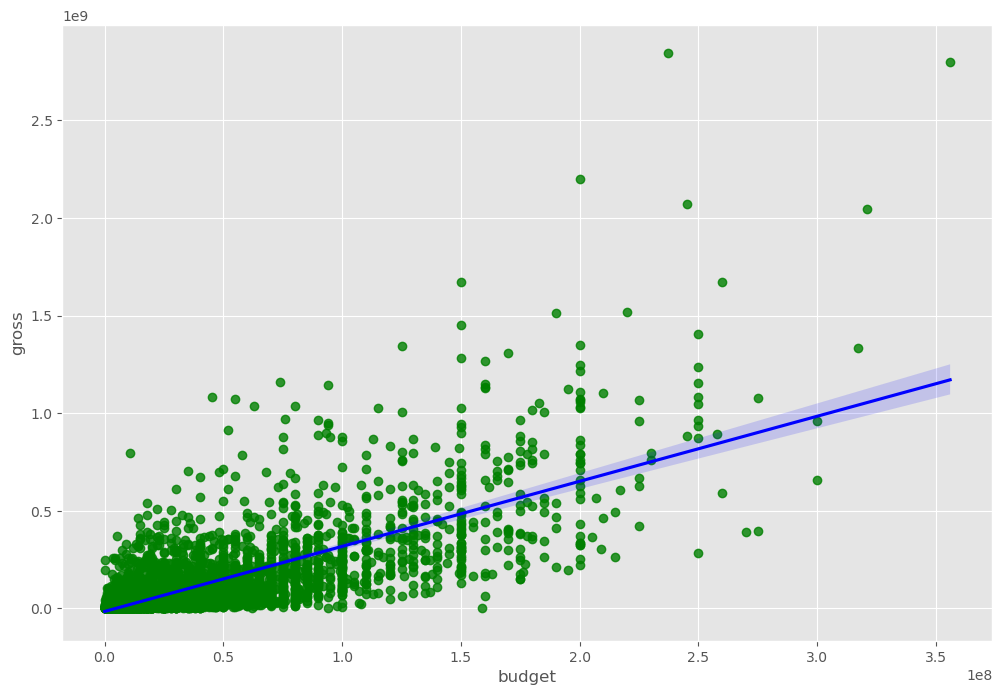

In [15]:
#plot 

sns.regplot(x = 'budget', y = 'gross', data = movies, scatter_kws = {'color':'green'}, line_kws = {'color':'blue'})
plt.show()


In [16]:
correlation_matrix = movies.corr(numeric_only=True)

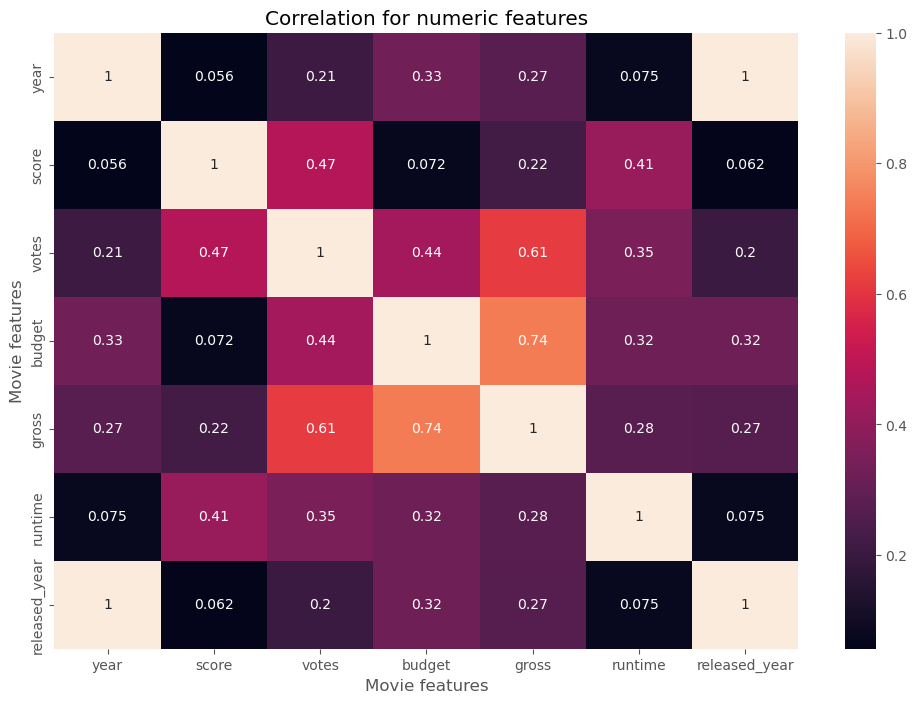

In [17]:
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [18]:


pairs = correlation_matrix.unstack()

sorted_pairs = pairs.sort_values()
sorted_pairs

year           score            0.056386
score          year             0.056386
released_year  score            0.061923
score          released_year    0.061923
               budget           0.072001
budget         score            0.072001
runtime        year             0.075077
year           runtime          0.075077
released_year  runtime          0.075294
runtime        released_year    0.075294
released_year  votes            0.203098
votes          released_year    0.203098
               year             0.206021
year           votes            0.206021
gross          score            0.222556
score          gross            0.222556
gross          released_year    0.268721
released_year  gross            0.268721
year           gross            0.274321
gross          year             0.274321
runtime        gross            0.275796
gross          runtime          0.275796
runtime        budget           0.318695
budget         runtime          0.318695
released_year  b

In [19]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes          gross            0.614751
gross          votes            0.614751
               budget           0.740247
budget         gross            0.740247
released_year  year             0.998726
year           released_year    0.998726
               year             1.000000
budget         budget           1.000000
gross          gross            1.000000
votes          votes            1.000000
score          score            1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

In [20]:
#The votes and budget of the film have the highest correlation to gross earnings